In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


In [28]:
data = pd.read_csv('data_baru.csv')


In [33]:
data.columns

Index(['tgl/bln/thn', 'suhu ', 'kelembapan (%)', 'curah hujan(mm)',
       'tekanan(kPa)', 'kecepatang angin(m/s)'],
      dtype='object')

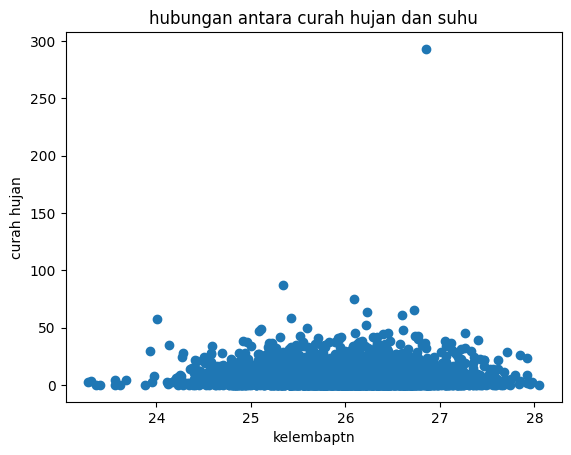

In [4]:
plt.scatter(data['suhu '],data['curah hujan(mm)'])
plt.xlabel("kelembaptn")
plt.ylabel("curah hujan")
plt.title("hubungan antara curah hujan dan suhu")
plt.show()



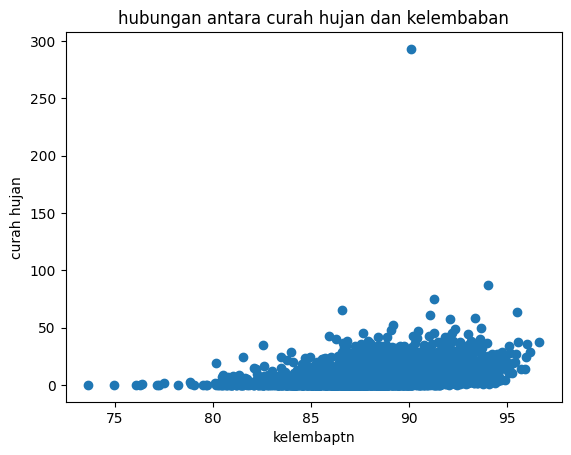

In [5]:
plt.scatter(data[ 'kelembapan (%)'],data['curah hujan(mm)'])
plt.xlabel("kelembaptn")
plt.ylabel("curah hujan")
plt.title("hubungan antara curah hujan dan kelembaban")
plt.show()

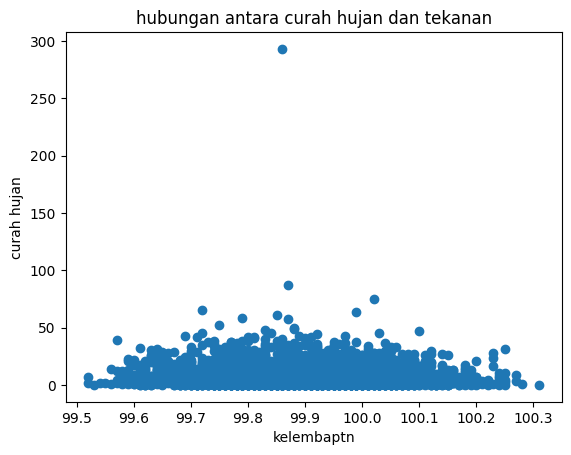

In [6]:
plt.scatter(data[ 'tekanan(kPa)'],data['curah hujan(mm)'])
plt.xlabel("kelembaptn")
plt.ylabel("curah hujan")
plt.title("hubungan antara curah hujan dan tekanan")
plt.show()

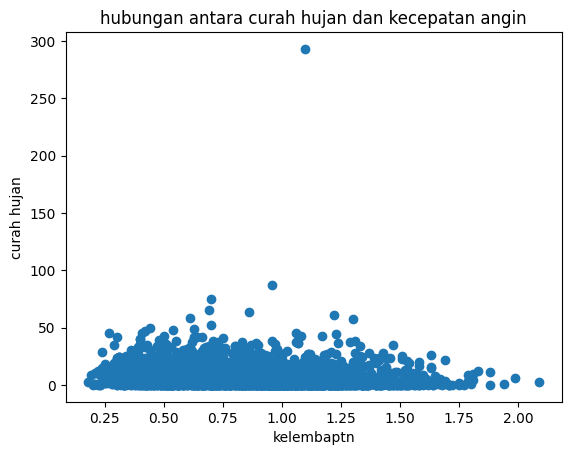

In [7]:
plt.scatter(data[ 'kecepatang angin(m/s)'],data['curah hujan(mm)'])
plt.xlabel("kelembaptn")
plt.ylabel("curah hujan")
plt.title("hubungan antara curah hujan dan kecepatan angin")
plt.show()

## ini menggunakan traindx

In [69]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# 3. Ambil fitur dan target
X = data[['suhu ', 'kelembapan (%)', 'tekanan(kPa)', 'kecepatang angin(m/s)']]
Y = data['curah hujan(mm)'].values.reshape(-1, 1)

# 4. Normalisasi
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
X_norm = scaler_X.fit_transform(X)
Y_norm = scaler_Y.fit_transform(Y)

# 5. Split data
N = X_norm.shape[0]
idx_train = int(0.7 * N)
X_train = X_norm[:idx_train]
Y_train = Y_norm[:idx_train]
X_test = X_norm[idx_train:]
Y_test = Y_norm[idx_train:]

# 6. Buat JST
model = Sequential([
    Dense(4, input_dim=4, activation='sigmoid'),
    Dense(100, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])



model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=True), loss='mse')
model.fit(X_train, Y_train, epochs=100, verbose=1)

# 7. Prediksi
Y_pred = model.predict(X_test)


Epoch 1/100


c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0153
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0010    
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011  
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012 
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.9860e-04
Epoch 9/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0010  
Epoch 10/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.5533e-04
Epoch 11/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0015
Epoch 12/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014
Epoch 13/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.6789e-04
Epoch 14/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0014
Epoch 15/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

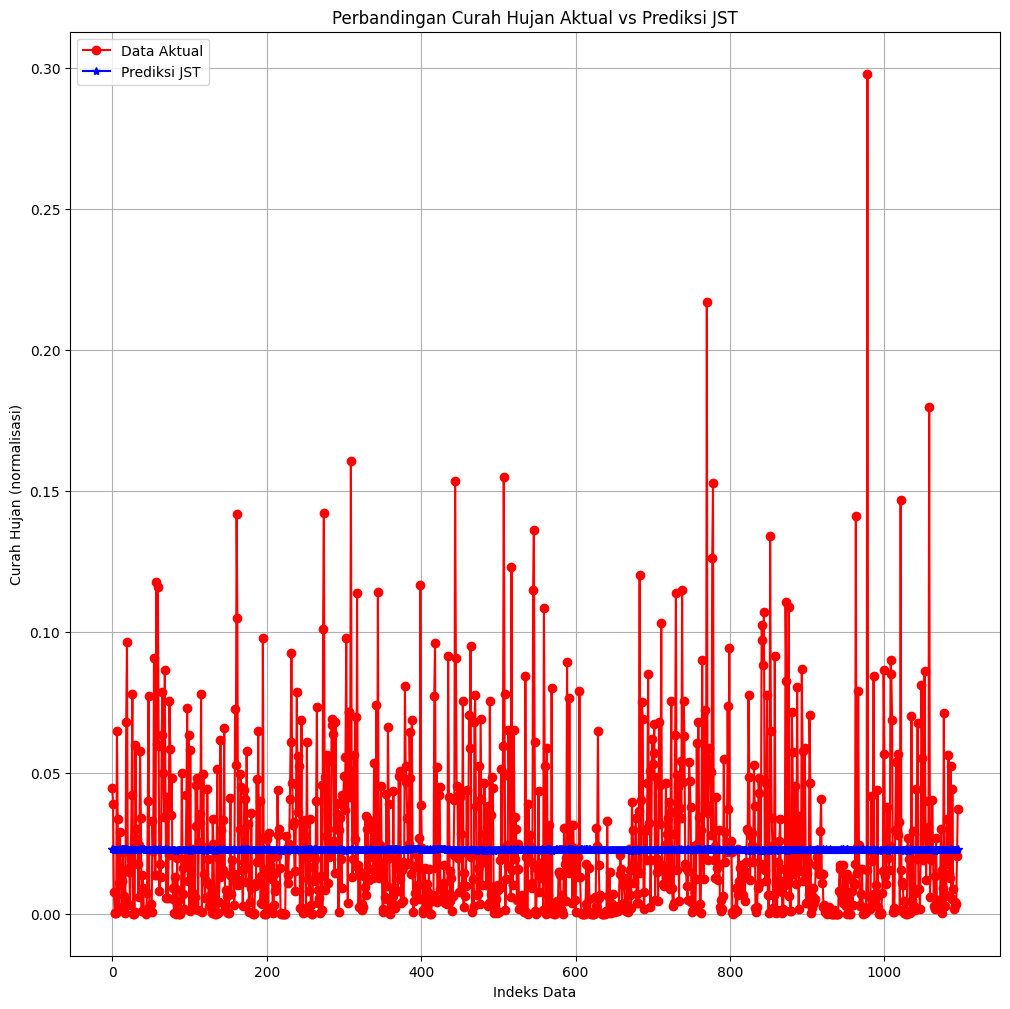

In [70]:
plt.figure(figsize=(12,12))
plt.plot(Y_test, 'r-o', label='Data Aktual')
plt.plot(Y_pred, 'b-*', label='Prediksi JST')
plt.legend()
plt.xlabel('Indeks Data')
plt.ylabel('Curah Hujan (normalisasi)')
plt.title('Perbandingan Curah Hujan Aktual vs Prediksi JST')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
# Konversi test dan prediksi ke array numerik
actual = np.array(Y_test)
predicted = np.array(Y_pred)
# MAE
mae_value = mean_absolute_error(actual, predicted)
# MSE
mse_value = mean_squared_error( predicted,actual)
# Tampilkan hasil evaluasi
print(f"MSE : {mse_value:.4f}")

## menggunakan trainrp


In [66]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
# 3. Ambil fitur dan target
X = data[['suhu ', 'kelembapan (%)', 'tekanan(kPa)', 'kecepatang angin(m/s)']]
Y = data['curah hujan(mm)'].values.reshape(-1, 1)

# 4. Normalisasi
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
X_norm = scaler_X.fit_transform(X)
Y_norm = scaler_Y.fit_transform(Y)

# 5. Split data
N = X_norm.shape[0]
idx_train = int(0.7 * N)
X_train = X_norm[:idx_train]
Y_train = Y_norm[:idx_train]
X_test = X_norm[idx_train:]
Y_test = Y_norm[idx_train:]

# 6. Buat JST
model = Sequential([
    Dense(4, input_dim=4, activation='sigmoid'),
    Dense(100, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])



model.compile(optimizer=RMSprop(learning_rate=0.01), loss='mse')
model.fit(X_train, Y_train, epochs=100, verbose=1)

# 7. Prediksi
Y_pred = model.predict(X_test)


c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0067
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012 
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.0388e-04
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.2712e-04
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0013
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9.4725e-04
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.7528e-04
Epoch 9/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012 
Epoch 10/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0016
Epoch 11/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0017
Epoch 12/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0015
Epoch 13/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.0112e-04
Epoch 14/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.8612e-04
Epoch 15/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5m

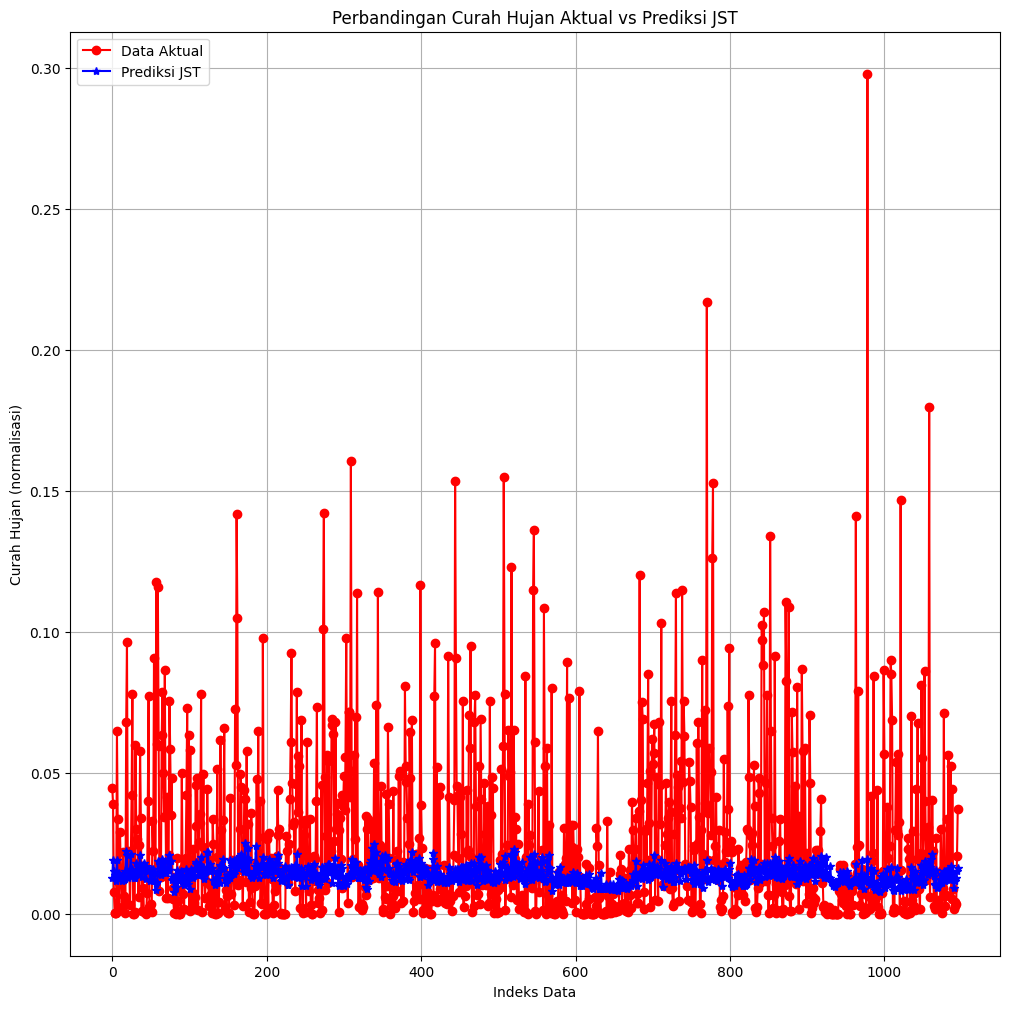

In [68]:
plt.figure(figsize=(12,12))
plt.plot(Y_test, 'r-o', label='Data Aktual')
plt.plot(Y_pred, 'b-*', label='Prediksi JST')
plt.legend()
plt.xlabel('Indeks Data')
plt.ylabel('Curah Hujan (normalisasi)')
plt.title('Perbandingan Curah Hujan Aktual vs Prediksi JST')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
# Konversi test dan prediksi ke array numerik
actual = np.array(Y_test)
predicted = np.array(Y_pred)
# MAE
mae_value = mean_absolute_error(actual, predicted)
# MSE
mse_value = mean_squared_error( predicted,actual)
# Tampilkan hasil evaluasi
print(f"MSE : {mse_value:.4f}")

## ini menggunakan trainlp

In [61]:
# # 2. Tampilkan sebagian isi data
# print(data.head())
# 3. Ambil fitur dan target
X = data[['suhu ', 'kelembapan (%)',
       'tekanan(kPa)', 'kecepatang angin(m/s)']]
Y = data['curah hujan(mm)'].values.reshape(-1, 1)
# 4. Normalisasi ke 0-1
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
X_norm = scaler_X.fit_transform(X)
Y_norm = scaler_Y.fit_transform(Y)
# 5. Split data latih dan uji (80:20)
N = X_norm.shape[0]
idx_train = int(0.7 * N)
X_train = X_norm[:idx_train]
Y_train = Y_norm[:idx_train]
X_test = X_norm[idx_train:]


Y_test = Y_norm[idx_train:]
# 6. Membuat dan melatih JST
model = Sequential([
 Dense(4, input_dim=4, activation='sigmoid'),
 Dense(100, activation='sigmoid'), # hidden layer
 Dense(1, activation='sigmoid') # output layer
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, Y_train, epochs=100, verbose=1)
# 7. Prediksi
Y_pred = model.predict(X_test)
# 8. Visualisasi hasil

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.1712
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0060
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0030
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0012
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0016
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0010    
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.2865e-04
Epoch 9/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014 
Epoch 10/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.4146e-04
Epoch 11/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0026
Epoch 12/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014
Epoch 13/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011   
Epoch 14/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.4169e-04
Epoch 15/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

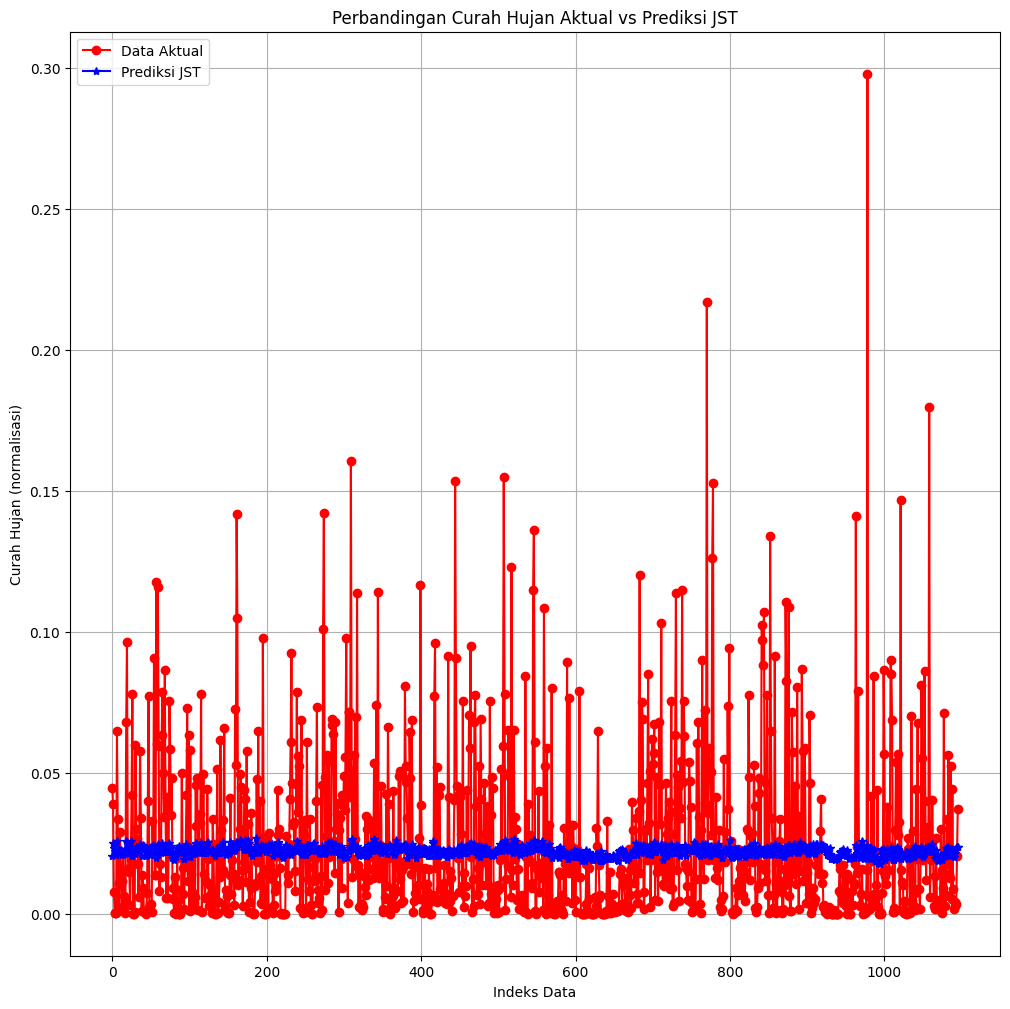

In [62]:
plt.figure(figsize=(12,12))
plt.plot(Y_test, 'r-o', label='Data Aktual')
plt.plot(Y_pred, 'b-*', label='Prediksi JST')
plt.legend()
plt.xlabel('Indeks Data')
plt.ylabel('Curah Hujan (normalisasi)')
plt.title('Perbandingan Curah Hujan Aktual vs Prediksi JST')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
# Konversi test dan prediksi ke array numerik
actual = np.array(Y_test)
predicted = np.array(Y_pred)
# MAE
mae_value = mean_absolute_error(actual, predicted)
# MSE
mse_value = mean_squared_error( predicted,actual)
# Tampilkan hasil evaluasi
print(f"MSE : {mse_value:.4f}")

MSE : 0.0009


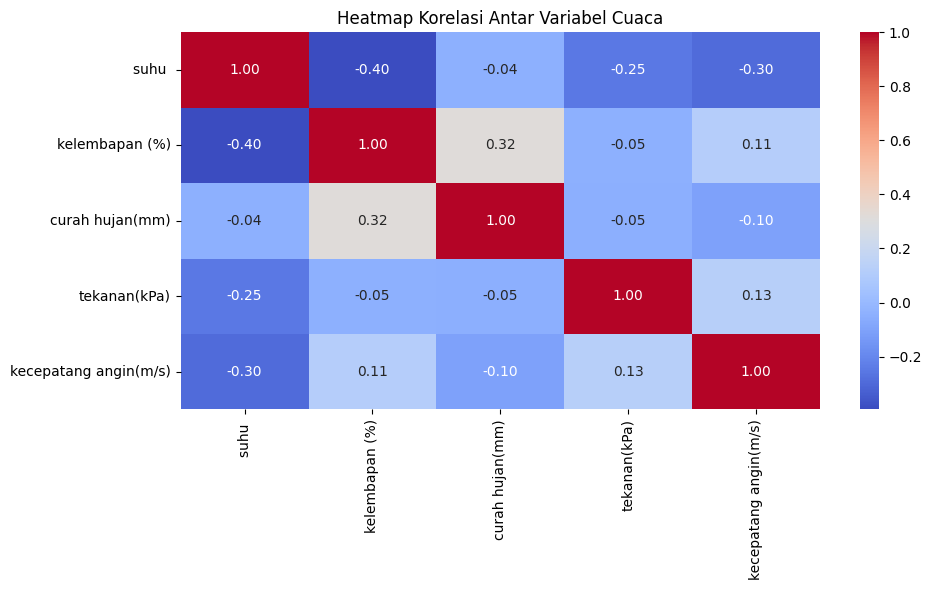

In [38]:
# Pilih hanya kolom numerik (hapus kolom tanggal)
numerik_data = data[['suhu ', 'kelembapan (%)', 'curah hujan(mm)',
       'tekanan(kPa)', 'kecepatang angin(m/s)']]


# Hitung korelasi
corr = numerik_data.corr()

# Buat heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Variabel Cuaca')
plt.tight_layout()
plt.show()

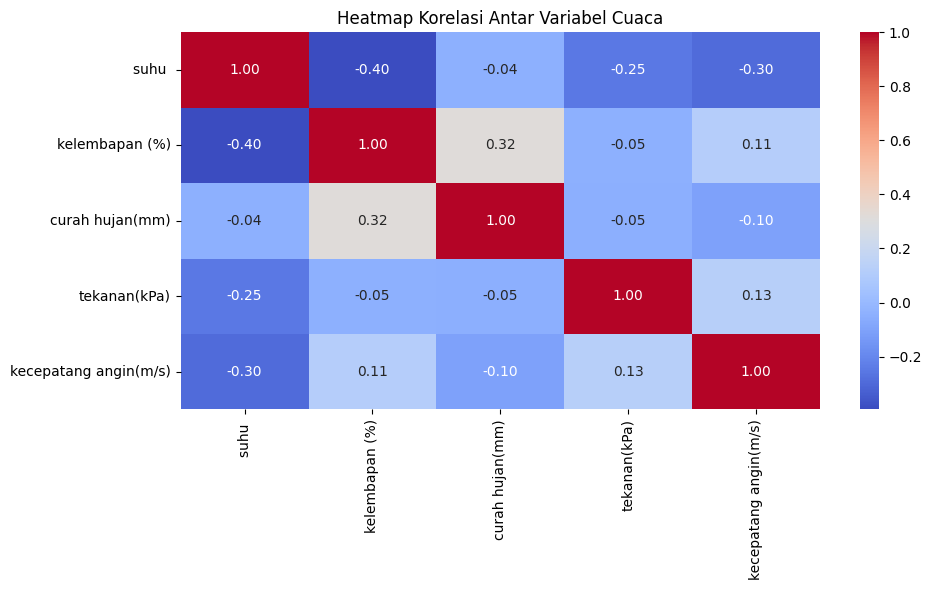

In [ ]:
# Pilih hanya kolom numerik (hapus kolom tanggal)
numerik_data = data[['suhu ', 'kelembapan (%)', 'curah hujan(mm)',
       'tekanan(kPa)', 'kecepatang angin(m/s)']]


# Hitung korelasi
corr = numerik_data.corr()

# Buat heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Variabel Cuaca')
plt.tight_layout()
plt.show()

In [39]:
data.describe()

,suhu,kelembapan (%),curah hujan(mm),tekanan(kPa),kecepatang angin(m/s)
count,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000
mean,26.073138,88.505854,6.872133,99.886265,0.827982
std,0.684244,2.921904,9.565441,0.125080,0.318644
min,23.280000,73.640000,0.000000,99.520000,0.180000
25%,25.620000,86.740000,1.050000,99.800000,0.580000
50%,26.090000,88.625000,3.950000,99.880000,0.800000
75%,26.550000,90.510000,9.340000,99.970000,1.050000
max,28.050000,96.630000,293.220000,100.310000,2.090000
